# Pneumonia - Análisis de caso dataset salud
<P>Dataset elegido del sector salud:</P>

* https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

<P>Soluciones planteadas de:</P>

* Preentrenamiento (transfer learning).
* Data aumentation.
* Pasos esenciales de entrenamiento del modelo: Grafica del entrenamiento y curva de validación (aprende o no).
* Dos escenarios: Uno con hipper-parametros  basicos y el otro con ajuste (optimizado) que compruebe la mejora. Resumen interpretado de 300 palabras del porqué de la mejoría.
* Modelos posibles a emplear: CNN, RNN, GAN, VAE, LSTM, Transformers, Autoenders, entre otros escenario de Deep Learning.
* En adición al resumen, abundar sobre los findings, utilidad del datasets y cómo pudiera aplicar para su tesis del master en contraste con RD (barreras, permisos necesarios y otras proyecciones del path a seguir). 5 páginas máximo en formato APA.

## Dependencias a instalar


In [1]:
!pip install kagglehub tensorflow matplotlib

## Librerías a importar

In [2]:
import os
import tensorflow as tf
import kagglehub
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
import shutil
import matplotlib.pyplot as plt

## Preparando el dataset salud pneumonia

In [ ]:
path_dataset_pneu = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
print("Pneumonia Dataset descargado en:", path_dataset_pneu)

# Copiar a carpeta fija para no generar problemas con el path
path_dest = "./chest_xray_dataset"
shutil.copytree(path_dataset_pneu, path_dest, dirs_exist_ok=True)

# Ajustar
train_ub = os.path.join(path_dest, "chest_xray/train")
val_ub   = os.path.join(path_dest, "chest_xray/val")
test_ub  = os.path.join(path_dest, "chest_xray/test")

# Verificar
assert os.path.exists(train_ub), f"No encontrado {train_ub}"
assert os.path.exists(val_ub), f"No encontrado {val_ub}"
assert os.path.exists(test_ub), f"No encontrado {test_ub}"

Using Colab cache for faster access to the 'chest-xray-pneumonia' dataset.
Dataset descargado en: /kaggle/input/chest-xray-pneumonia


## Generador de imágenes

In [ ]:
datagen_basic_train = ImageDataGenerator(rescale=1./255)
datagen_aug_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen_basic = datagen_basic_train.flow_from_directory(
    train_ub, target_size=(224,224), batch_size=32, class_mode='binary'
)
train_gen_aug = datagen_aug_train.flow_from_directory(
    train_ub, target_size=(224,224), batch_size=16, class_mode='binary'
)
gen_val = val_datagen.flow_from_directory(
    val_ub, target_size=(224,224), batch_size=16, class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


## Modelo Base Creado (Transfer Learning)

In [ ]:
model_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model_base.trainable = False  # 1ra Fase - congelar capas

def create_model(model_base, lr=0.001, dropout=0.5):
    model = Sequential([
        model_base,
        GlobalAveragePooling2D(),
        Dropout(dropout),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### Paso 1- Modelo Básico



In [ ]:
modelo_basico = create_model(model_base, lr=0.001, dropout=0.3)
history = modelo_basico.fit(
    train_gen_basic,
    validation_data=gen_val,
    epochs=10
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 876s 5s/step - accuracy: 0.7203 - loss: 0.5839 - val_accuracy: 0.5000 - val_loss: 0.7564
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 918s 5s/step - accuracy: 0.7457 - loss: 0.5463 - val_accuracy: 0.5000 - val_loss: 0.8027
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 866s 5s/step - accuracy: 0.7394 - loss: 0.5205 - val_accuracy: 0.5000 - val_loss: 0.7894
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 870s 5s/step - accuracy: 0.7544 - loss: 0.4895 - val_accuracy: 0.5000 - val_loss: 0.7423
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 857s 5s/step - accuracy: 0.7641 - loss: 0.4752 - val_accuracy: 0.5000 - val_loss: 0.8232
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 852s 5s/step - accuracy: 0.7697 - loss: 0.4619 - val_accuracy: 0.5000 - val_loss: 0.7696
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 867s 5s/step - accuracy: 0.7697 - loss: 0.4577 - val_accuracy: 0.5625 - val_loss: 0.7957
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 858s 5s/step - accuracy: 0.7878 - loss: 0.4290 - val_accu

### Paso 2- Modelo Optimizado (Data Augmentation + Fine-Tuning)

In [ ]:
# Descongelar capas finales para el fine-tuning
model_base.trainable = True
for layer in model_base.layers[:-20]:
    layer.trainable = False

opt_modelo = create_model(model_base, lr=0.0001, dropout=0.5)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, verbose=1)

history_opt = opt_modelo.fit(
    train_gen_aug,
    validation_data=gen_val,
    epochs=30,
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/30
326/326 ━━━━━━━━━━━━━━━━━━━━ 1193s 4s/step - accuracy: 0.8473 - loss: 0.3356 - val_accuracy: 0.5000 - val_loss: 9.1463 - learning_rate: 1.0000e-04
Epoch 2/30
326/326 ━━━━━━━━━━━━━━━━━━━━ 1167s 4s/step - accuracy: 0.9020 - loss: 0.2241 - val_accuracy: 0.5000 - val_loss: 4.6080 - learning_rate: 1.0000e-04
Epoch 3/30
326/326 ━━━━━━━━━━━━━━━━━━━━ 1167s 4s/step - accuracy: 0.9140 - loss: 0.2034 - val_accuracy: 0.5625 - val_loss: 3.5090 - learning_rate: 1.0000e-04
Epoch 4/30
326/326 ━━━━━━━━━━━━━━━━━━━━ 1170s 4s/step - accuracy: 0.9248 - loss: 0.1872 - val_accuracy: 0.5000 - val_loss: 6.0276 - learning_rate: 1.0000e-04
Epoch 5/30
326/326 ━━━━━━━━━━━━━━━━━━━━ 1171s 4s/step - accuracy: 0.9263 - loss: 0.1904 - val_accuracy: 0.7500 - val_loss: 0.4207 - learning_rate: 1.0000e-04
Epoch 6/30
326/326 ━━━━━━━━━━━━━━━━━━━━ 1168s 4s/step - accuracy: 0.9326 - loss: 0.1716 - val_accuracy: 0.5000 - val_loss: 2.6433 - learning_rate: 1.0000e-04
Epoch 7/30
326/326 ━━━━━━━━━━━━━━━━━━━━ 1170s 4s/ste

### Graficar Historias con Funciones

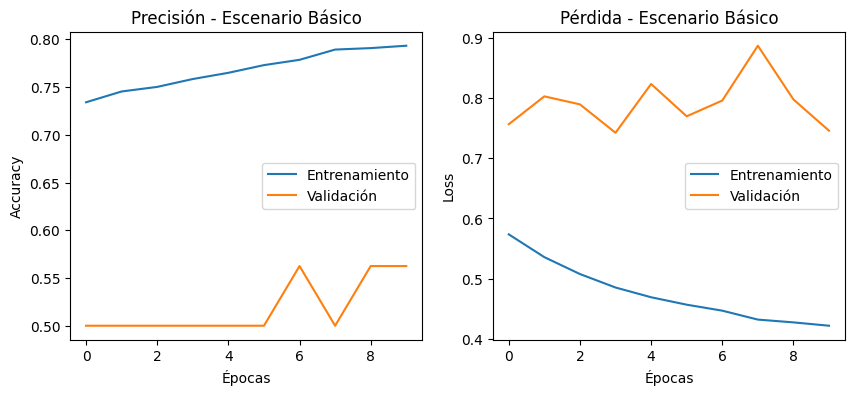

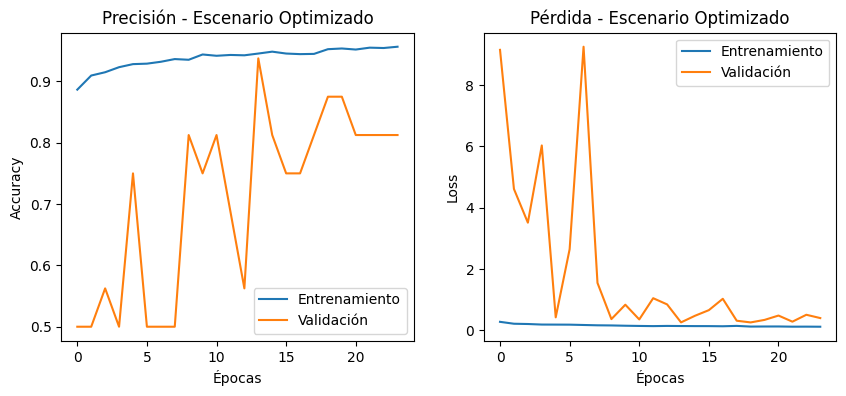

In [ ]:
def plot_history(history, title):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Validación')
    plt.title(f'Precisión - {title}')
    plt.xlabel('Épocas')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Entrenamiento')
    plt.plot(history.history['val_loss'], label='Validación')
    plt.title(f'Pérdida - {title}')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history, "Escenario Básico")
plot_history(history_opt, "Escenario Optimizado")

## Última Evaluación

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = test_datagen.flow_from_directory(
    test_ub, target_size=(224,224), batch_size=16, class_mode='binary', shuffle=False
)

loss_b, accuracy_b = modelo_basico.evaluate(test_gen)
loss_opt, accuracy_opt = opt_modelo.evaluate(test_gen)

print("CONCLUSIONES DE AMBOS MODELOS:")
print(f"Básico: Accuracy: {accuracy_b:.4f}, Loss: {loss_b:.4f}")
print(f"Optimizado: Accuracy: {accuracy_opt:.4f}, Loss: {loss_opt:.4f}")

## Salvaguardar el Modelo

In [ ]:
opt_modelo.save("pneumonia_model_opt")
print("Modelo optimizado guardado como pneumonia_model_opt")

In [ ]:
from tensorflow.keras.models import load_model

# Cargar el modelo guardado
model = load_model("pneumonia_model_opt")
print("Modelo cargado con éxito")

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_preprocess_image(img_path, target_size=(224,224)):
    img = image.load_img(img_path, target_size=target_size)  # Redimensionarlo
    img_array = image.img_to_array(img) # Convertirlo a array
    img_array = img_array / 255.0 # Normalizarlo
    img_array = np.expand_dims(img_array, axis=0) # Añadir batch dimension
    return img_array

In [ ]:
uploaded_fs = files.upload()
for filename in uploaded_fs.keys():
    print(f"Procesando {filename}...")
    img_array = load_and_preprocess_image(filename)

# 4️- Predicción
pred = model.predict(img_array)
print("Predicción cruda:", pred)

# 5️- Resultado
if pred[0][0] > 0.5:
    print("Result: PNEUMONÍA")
else:
    print("Result: NORMAL")